In [1]:
import pandas as pd

zooniverse_df = pd.read_csv("./segment_non_stars-classifications.csv")
zooniverse_df  = zooniverse_df[zooniverse_df['workflow_id']==25237]

In [2]:
import numpy as np

np.unique(zooniverse_df['user_name']), np.unique(zooniverse_df['workflow_id'])

(array(['not-logged-in-02cad8012e37fb3edd5e',
        'not-logged-in-1f01a6c9241b43559db0',
        'not-logged-in-5288a91c3048d611d959', 'ori_j'], dtype=object),
 array([25237]))

In [3]:
zooniverse_df

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,513195000,ori_j,2653324.0,5e366863292a31442166,25237,segment_non_stars,12.700,2023-09-27 14:22:53 UTC,NaN,NaN,"{""source"":""api"",""session"":""a39392b03376f0ac439...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""458030"":{""retired"":null,""link"":""https://www....",458030
1,513195146,ori_j,2653324.0,5e366863292a31442166,25237,segment_non_stars,12.700,2023-09-27 14:23:30 UTC,NaN,NaN,"{""source"":""api"",""session"":""a39392b03376f0ac439...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""458042"":{""retired"":null,""link"":""https://www....",458042
2,513198722,ori_j,2653324.0,3e77473973e26779ce87,25237,segment_non_stars,12.700,2023-09-27 14:40:58 UTC,NaN,NaN,"{""source"":""api"",""session"":""a39392b03376f0ac439...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""458026"":{""retired"":null,""link"":""https://www....",458026
3,513336188,ori_j,2653324.0,475a589f166f79de073c,25237,segment_non_stars,12.700,2023-09-28 07:57:27 UTC,NaN,NaN,"{""source"":""api"",""session"":""1fab85974bbb173cc45...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""92073600"":{""retired"":null,""Filename"":""ds9.pn...",92073600
4,513337966,ori_j,2653324.0,12dd923de395ba8723d4,25237,segment_non_stars,20.180,2023-09-28 08:23:43 UTC,NaN,NaN,"{""source"":""api"",""session"":""8af14c37bb6fb75ee96...","[{""task"":""T0"",""task_label"":""Draw a mask (shape...","{""92073600"":{""retired"":null,""Filename"":""ds9.pn...",92073600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,548623192,ori_j,2653324.0,2c91efb6f63638db6694,25237,segment_non_stars,145.244,2024-03-19 11:27:44 UTC,NaN,NaN,"{""source"":""api"",""session"":""76822319cebabd5f6d3...","[{""task"":""T2"",""task_label"":""Does the image hav...","{""96758904"":{""retired"":{""id"":125809522,""workfl...",96758904
71,548623238,ori_j,2653324.0,2c91efb6f63638db6694,25237,segment_non_stars,145.244,2024-03-19 11:28:15 UTC,NaN,NaN,"{""source"":""api"",""session"":""76822319cebabd5f6d3...","[{""task"":""T2"",""task_label"":""Does the image hav...","{""96758764"":{""retired"":{""id"":125809550,""workfl...",96758764
72,549566098,ori_j,2653324.0,c1f2fb2a1012964f8d10,25237,segment_non_stars,145.244,2024-03-22 15:08:02 UTC,NaN,NaN,"{""source"":""api"",""session"":""fb6d0e5979ec7e25454...","[{""task"":""T2"",""task_label"":""Does the image hav...","{""96759022"":{""retired"":{""id"":125809538,""workfl...",96759022
73,549566108,ori_j,2653324.0,c1f2fb2a1012964f8d10,25237,segment_non_stars,145.244,2024-03-22 15:08:05 UTC,NaN,NaN,"{""source"":""api"",""session"":""fb6d0e5979ec7e25454...","[{""task"":""T2"",""task_label"":""Does the image hav...","{""96759111"":{""retired"":{""id"":125809579,""workfl...",96759111


convert csv string column to list

In [4]:
import json
zooniverse_df['annotations'] = zooniverse_df['annotations'].apply(lambda x:json.loads(x))

In [11]:
zooniverse_df['subject_data'] = zooniverse_df['subject_data'].apply(lambda x:json.loads(x))

In [12]:
zooniverse_df['annotations'][0][0].keys()

dict_keys(['task', 'task_label', 'value'])

In [13]:
task_labels = []

for annot in zooniverse_df['annotations']:
    if annot[0]['task_label'] not in task_labels:
        task_labels.append(annot[0]['task_label'])

In [14]:
task_labels

['Draw a mask (shape) of an artifact which has not been detected by initial model. ',
 'Segment an ARTEFACT or other objects different than stars. ',
 'Does the image have artefacts in it? If yes, how faint are they?',
 'Does the image have artefacts in it?']

In [15]:
k=0
for i in range(len(zooniverse_df['annotations'])):
    if zooniverse_df['annotations'][i][0]['task_label'] == 'Does the image have artefacts in it?' and \
     zooniverse_df['annotations'][i][0]['value'] in ['The image has artefacts. ', 'The image has **NO** artefacts.']:
        k+=1
        if len(zooniverse_df['annotations'][i])==1: # usually 'The image has **NO** artefacts.'
            print(zooniverse_df['annotations'][i][0]['value'], zooniverse_df['subject_data'][i])

The image has artefacts.  {'96236334': {'retired': None, 'metadata': 'S0652510101_L.png'}}
The image has **NO** artefacts. {'96281102': {'retired': None, 'metadata': 'S0094380601_S.png'}}
The image has **NO** artefacts. {'96281332': {'retired': None, 'metadata': 'S0674380501_M.png'}}
The image has **NO** artefacts. {'96281253': {'retired': None, 'metadata': 'S0693970301_M.png'}}
The image has **NO** artefacts. {'96280908': {'retired': {'id': 124903205, 'workflow_id': 25237, 'classifications_count': 1, 'created_at': '2024-02-08T21:15:48.071Z', 'updated_at': '2024-02-22T18:07:50.922Z', 'retired_at': '2024-02-22T18:07:50.907Z', 'subject_id': 96280908, 'retirement_reason': 'classification_count'}, 'metadata': 'S0201130201_S.png'}}
The image has **NO** artefacts. {'96281353': {'retired': {'id': 124903443, 'workflow_id': 25237, 'classifications_count': 1, 'created_at': '2024-02-08T21:23:43.831Z', 'updated_at': '2024-02-22T18:19:30.495Z', 'retired_at': '2024-02-22T18:19:30.487Z', 'subject_id'

S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
0 [{'value': 0}]
int32


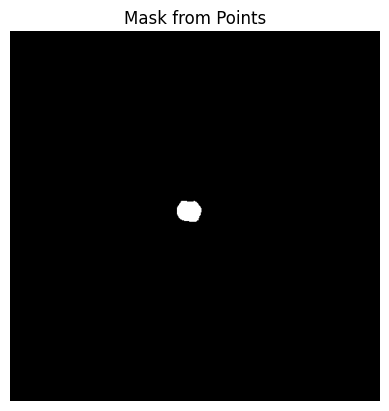

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 0}]
int32


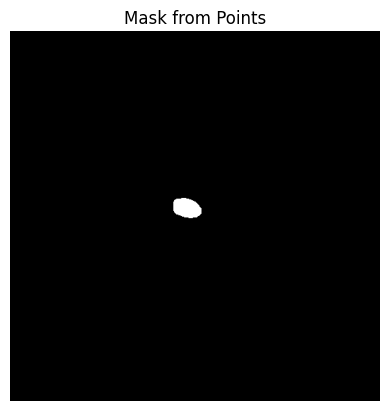

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.
0 [{'value': 3}]
int32


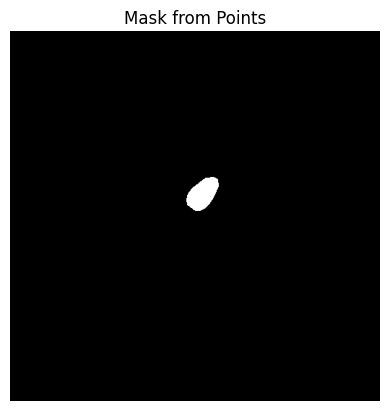

0 dict_keys(['tool', 'frame', 'closed', 'points', 'details', 'tool_label']) Polygon
0 [{'value': 3}]
int32


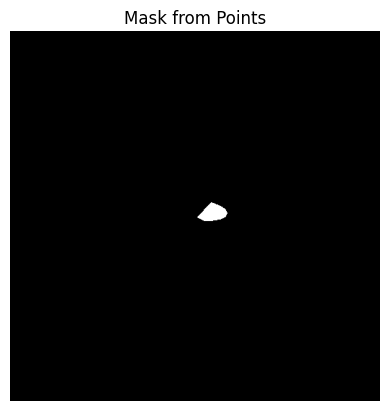

0 dict_keys(['tool', 'frame', 'closed', 'points', 'details', 'tool_label']) Polygon
0 [{'value': 2}]
int32


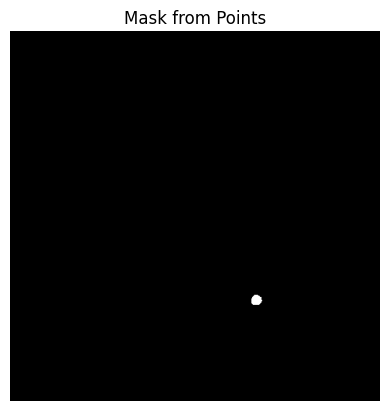

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 0}]
int32


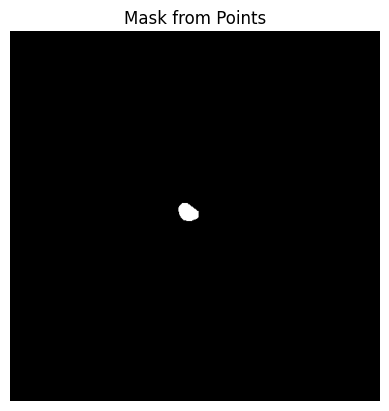

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 3}]
int32


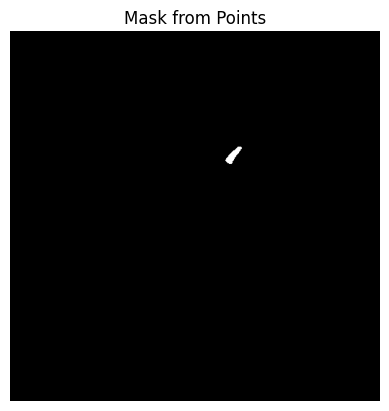

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 0}]
int32


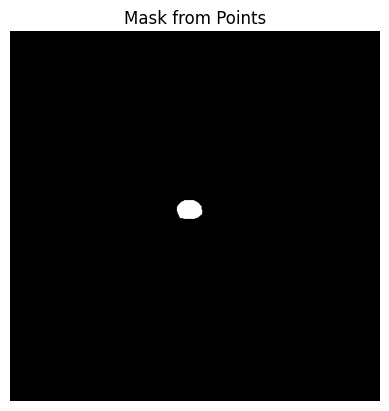

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
S0891801501_M has NO artefacts.
0 [{'value': 0}]
int32


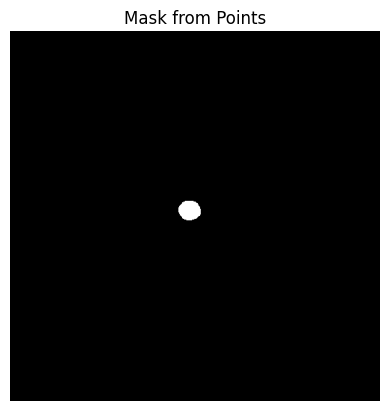

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 3}]
int32


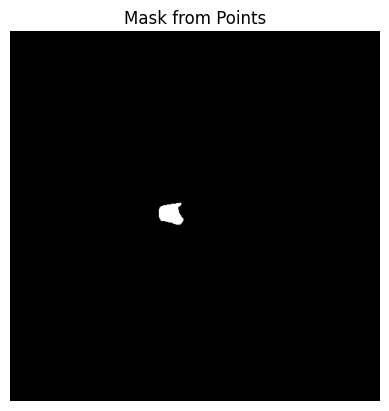

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 3}]
int32


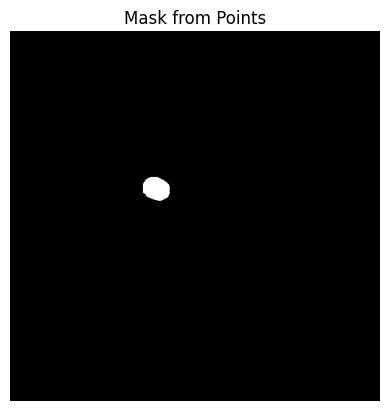

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 0}]
int32


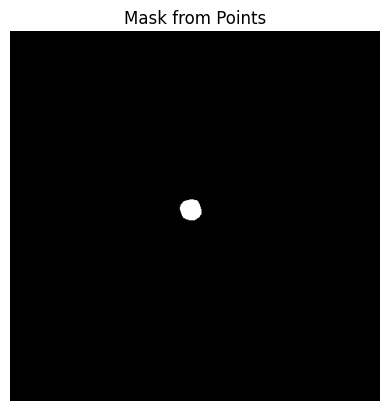

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 1}]
[266.142822265625, 23.052413940429688, 6.082122802734375, 222.29200744628906]


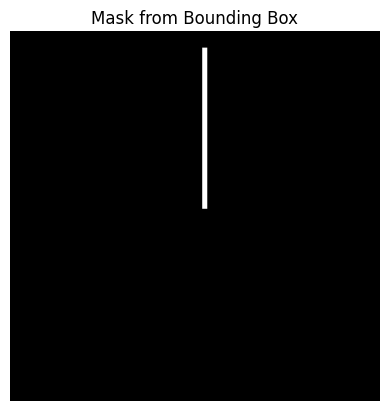

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 1}]
[265.581787109375, 291.04803466796875, 8.07086181640625, 210.4205322265625]


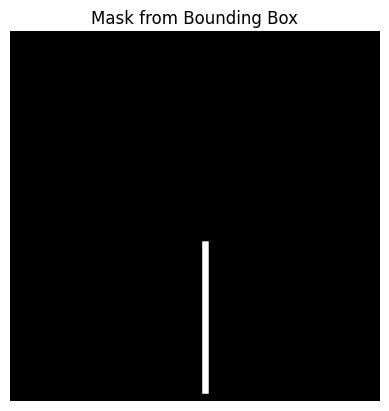

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 3}]
int32


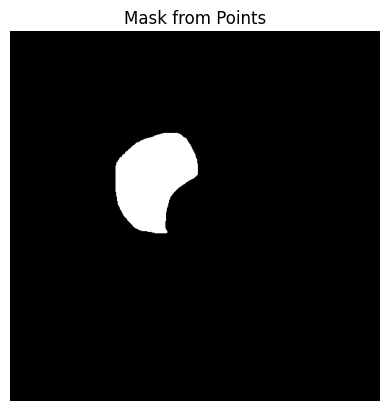

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 3}]
int32


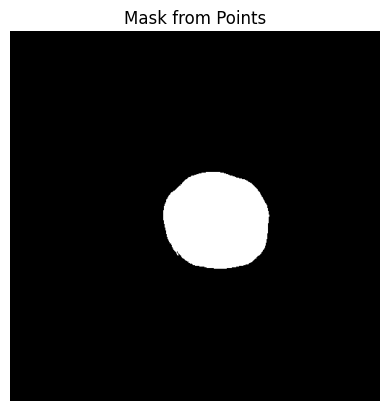

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 1}]
[308.1842956542969, 141.6424560546875, 4.1365966796875, 104.10366821289062]


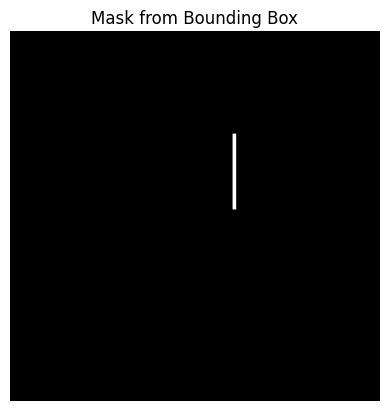

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 1}]
[307.0433654785156, 332.69525146484375, 4.116790771484375, 45.19873046875]


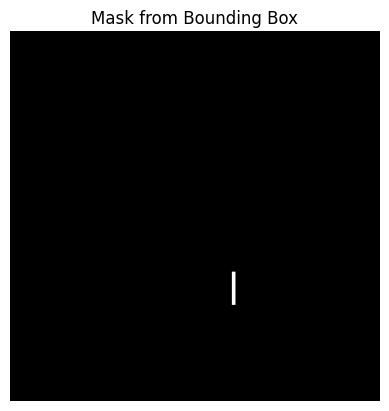

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 2}]
int32


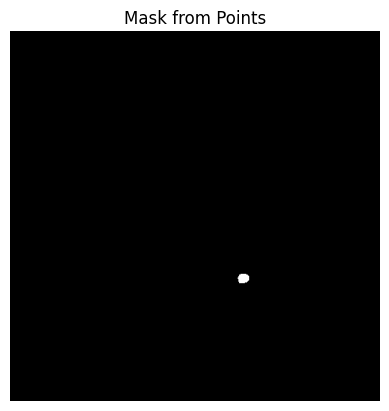

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 1}]
[165.6881103515625, 212.91363525390625, 4.56500244140625, 287.8697509765625]


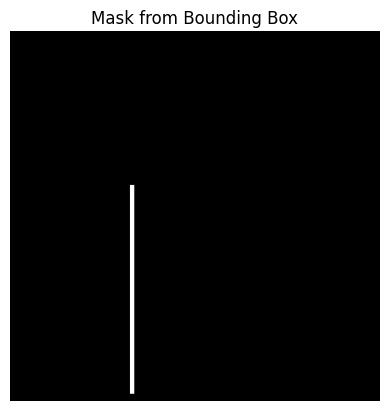

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 2}]
int32


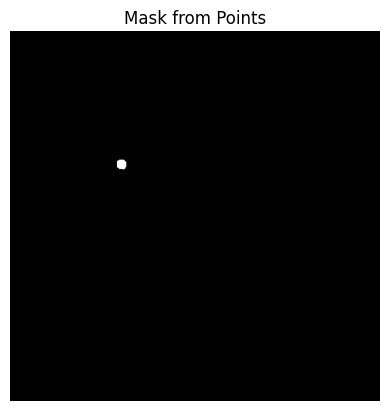

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 1}]
[165.79541015625, 21.350929260253906, 4.32940673828125, 159.22830963134766]


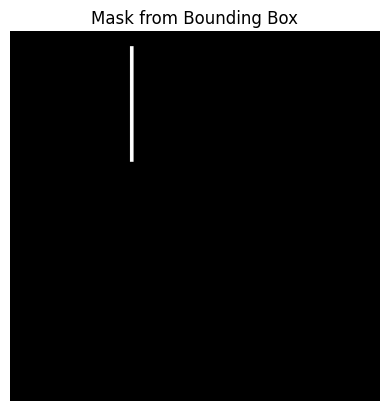

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 3}]
int32


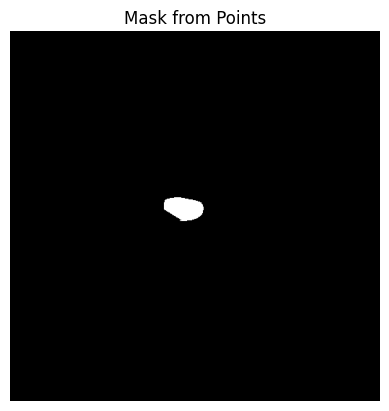

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 3}]
int32


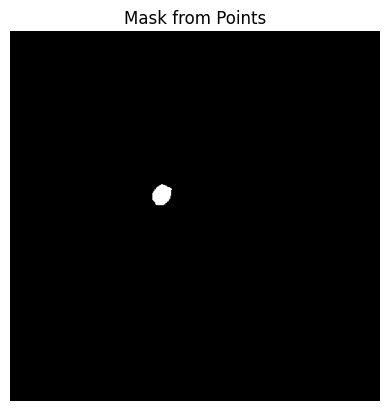

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 3}]
int32


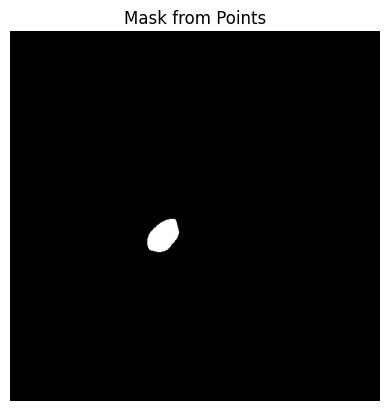

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 3}]
int32


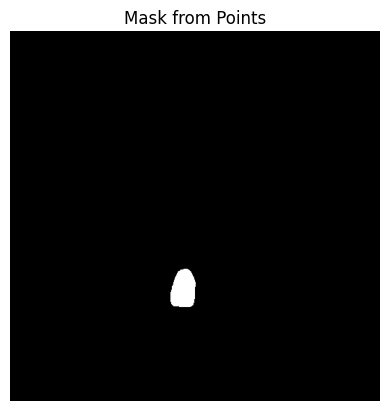

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 4}]
int32


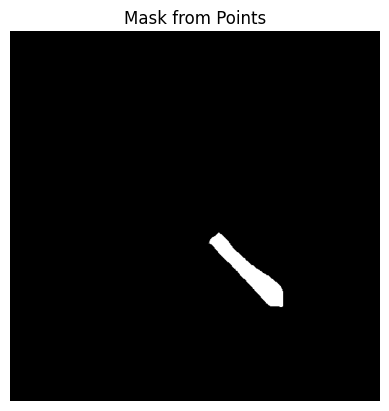

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 4}]
int32


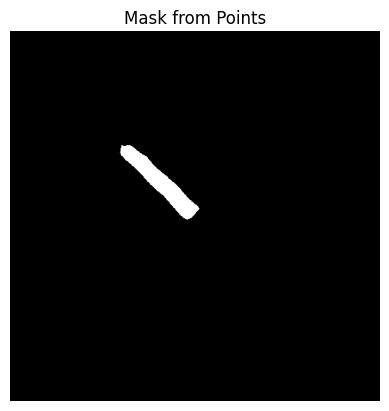

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
S0891801501_M has NO artefacts.
0 [{'value': 1}]
[156.31707763671875, 142.08563232421875, 4.687774658203125, 235.30349731445312]


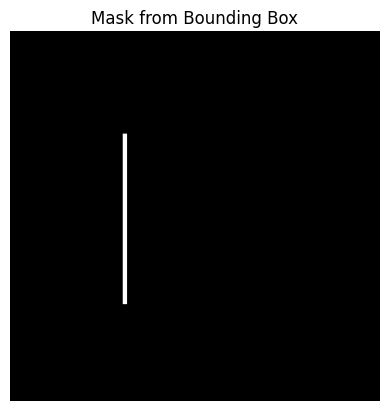

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 2}]
int32


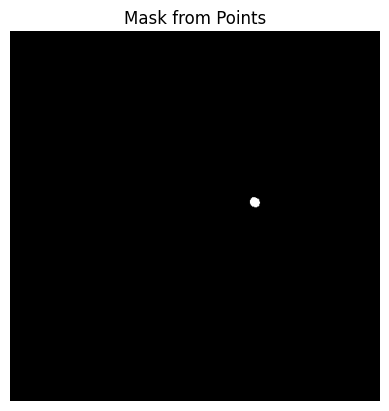

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 1}]
[292.658203125, -0.04217529296875, 5.080810546875, 461.70880126953125]


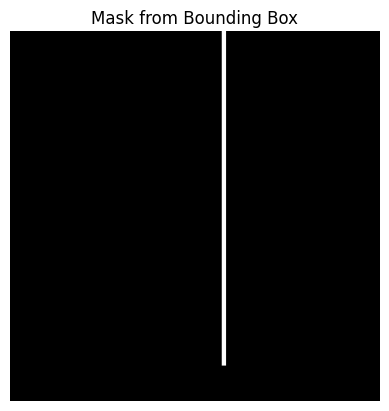

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 1}]
[292.192138671875, 497.3868408203125, 3.939910888671875, 14.73321533203125]


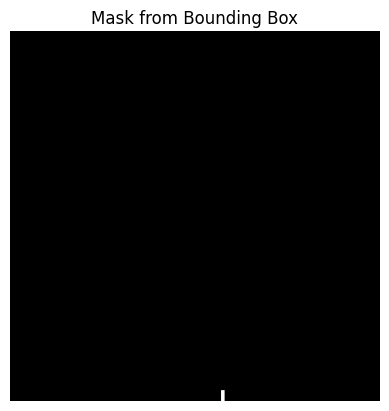

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 0}]
int32


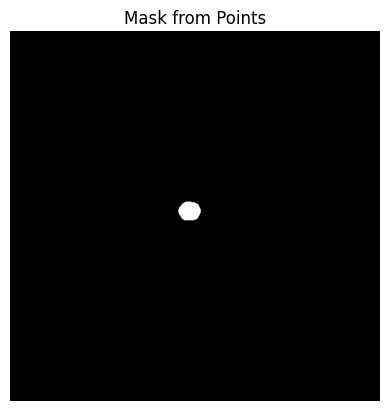

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 2}]
int32


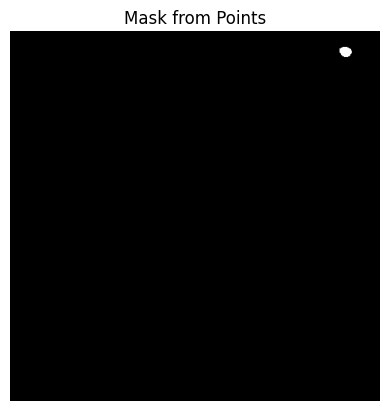

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 1}]
[473.96551513671875, 29.02081298828125, 3.87774658203125, 483.42120361328125]


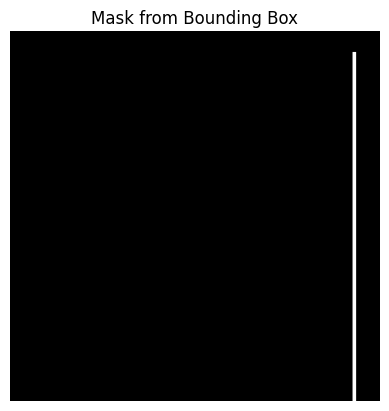

1 dict_keys(['x', 'y', 'tool', 'frame', 'width', 'height', 'details', 'tool_label']) Bounding box (useful for **read-out-streaks**)
0 [{'value': 3}]
int32


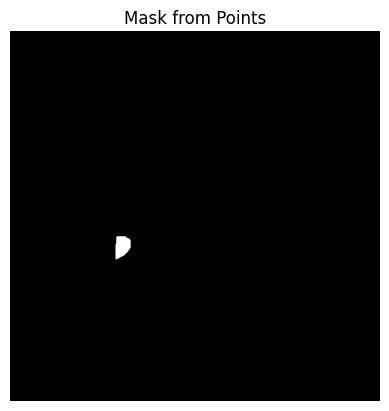

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 3}]
int32


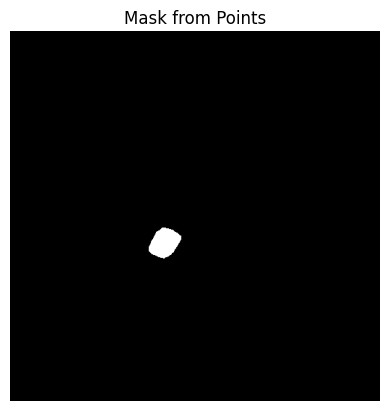

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
0 [{'value': 0}]
int32


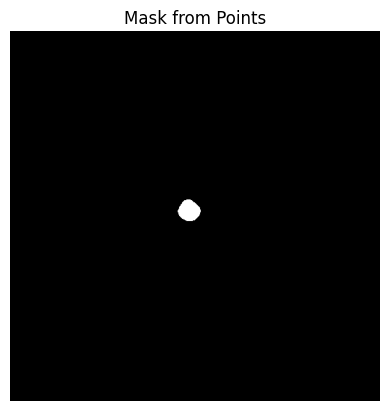

2 dict_keys(['tool', 'frame', 'points', 'details', 'tool_label']) Free form
S0891801501_M has NO artefacts.
S0891801501_M has NO artefacts.


In [138]:
import matplotlib.pyplot as plt
import cv2
k=0

no_artefacts_images = []
for i in range(len(zooniverse_df['annotations'])):
    if zooniverse_df['annotations'][i][0]['task_label'] == 'Does the image have artefacts in it?' and \
     zooniverse_df['annotations'][i][0]['value'] in ['The image has artefacts. ', 'The image has **NO** artefacts.']:
        subject_data_key = list(zooniverse_df['subject_data'][i])[0] # Python 3.7 or later
        subject_data_key = zooniverse_df['subject_data'][i][subject_data_key]
        if 'metadata' in annot_key:
            image_name = annot_key['metadata'] 
        elif 'Observation' in annot_key:
            image_name = annot_key['Observation'] 
            annot = zooniverse_df['annotations'][i]
            if len(annot) <=1 : # usually no annotations in the image or 'The image has **NO** artefacts.'
                print(f'{image_name} has NO artefacts.')
                if image_name not in no_artefacts_images:
                    no_artefacts_images.append(image_name)
            else:
                for i in range(len(annot[1]['value'])):
                    value_key = annot[1]['value'][i]
                    tool_label = value_key['tool_label']
                    tool = value_key['tool']
                    frame = value_key['frame']
                    details = value_key['details']

                    # 0:Polygon
                    # 1:Bounding box (useful for **read-out-streaks**)
                    # 2:Free form
                    print(frame, details)
                    
                    if tool in [0, 2]:
                        points = value_key['points']
                        # print(points)
                                                
                        # Convert points to a format OpenCV expects
                        pts = np.array([[point['x']/1024.0*512, point['y']/1024.0*512] for point in points])
                        pts = np.append(pts, [pts[0]], axis=0)
                        pts = np.around(pts) # mathematically round coords
                        pts = np.array(pts, dtype=np.int32)
                        print(pts.dtype)
                        
                        shape = (512, 512)  
                        mask = np.zeros(shape, np.int16)
                        
                        # Draw the polygon and fill it
                        cv2.fillPoly(mask, [pts], color=(1))

                        # cv2.polylines(mask, np.int32([pts]), 1, (255,255,255))

                        plt.imshow(mask, cmap='gray')  # Display the mask in grayscale
                        plt.title('Mask from Points')
                        plt.axis('off')  # Hide axis ticks and labels
                        plt.show()

                    else: 
                        bbox_coords = [value_key['x']/1024.0*512, value_key['y']/1024.0*512, value_key['width']/1024.0*512, value_key['height']/1024.0*512]
                        print(bbox_coords)
                        bbox_coords = np.around(bbox_coords) # mathematically round coords
                        bbox_coords = np.array(bbox_coords, dtype=np.int16)
                        mask_shape = (512, 512) 
                        mask = np.zeros(mask_shape, dtype=np.uint8)
                        
                        # Draw a filled rectangle on the mask where the bounding box is
                        cv2.rectangle(
                            mask, 
                            (bbox_coords[0], bbox_coords[1]), 
                            (bbox_coords[2]+bbox_coords[0], bbox_coords[3]+bbox_coords[1]), 
                            color=(1), 
                            thickness=cv2.FILLED)
                        
                        # Display the mask
                        plt.imshow(mask, cmap='gray')
                        plt.title('Mask from Bounding Box')
                        plt.axis('off')
                        plt.show()
                    
                    print(tool, annot[1]['value'][i].keys(), tool_label)
        else:
            print("NO metadata", zooniverse_df['annotations'][i])
            
        if annot_key['retired'] == None:
            print('Retired', image_name)
            continue
        

In [78]:
k

14

In [89]:
no_artefacts_images

['S0891801501_M']